## Welcome to my kernel ! 
## <br>What you will find here . 

*      [EDA (Explotary Data Analysis)](#1)
*      [Hand-made Forward-Backward Functions](#2)
*     [Sklearn-Logistic Regression](#3)

<div id="1"/>
## EDA (Explotary Data Analysis)

In [1]:
import numpy as np # Linear Algebra Library
import pandas as pd # Data Processing Library
import matplotlib.pyplot as plt # Visualize Library

In [2]:
df = pd.read_csv("../input/voice.csv")
df.label = [1 if each == "male" else 0 for each in df.label]

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null int64
dtypes: float64(20), int64(1)
memory usage: 519.8 KB
None


In [5]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


In [6]:
y = df.label.values
x_data = df.drop("label",axis = 1) 

<div id="2"/>
## Hand-made Forward-Backward Functions

> 

### Normalization

In [7]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

### Train Test Split with Sklearn 

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train : ",x_train)
print("x_test : ",x_test)
print("y_train : ",y_train)
print("y_test : ",x_test)

x_train :                807       2495      2529    ...         1130      1294      860 
meanfreq  0.665832  0.690781  0.777030    ...     0.769594  0.672626  0.606196
sd        0.365315  0.481685  0.284782    ...     0.460609  0.410059  0.493876
median    0.713283  0.771153  0.762816    ...     0.843042  0.723528  0.643003
Q25       0.573272  0.751818  0.719151    ...     0.555666  0.499524  0.454718
Q75       0.739741  0.783035  0.853189    ...     0.962464  0.792204  0.790591
IQR       0.239920  0.096267  0.198279    ...     0.474255  0.367487  0.412510
skew      0.038499  0.074903  0.060899    ...     0.053743  0.027467  0.019698
kurt      0.002166  0.006989  0.006434    ...     0.003528  0.001484  0.000791
sp.ent    0.737625  0.656182  0.657650    ...     0.555573  0.768144  0.881705
sfm       0.444370  0.545160  0.398946    ...     0.278990  0.485163  0.741597
mode      0.666165  0.713092  0.635514    ...     0.974482  0.681182  0.619217
centroid  0.665832  0.690781  0.777030   

### Initializing weights and bias to our model.

In [9]:
def initialize_weight_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.00
    return w,b
def sigmoid(z):
    y_head = 1/ (1+np.exp(-z))
    return y_head

### We need forward & backward propagation to decrease loss function

In [10]:
def forward_backward_propagation(w,b,x_train,y_train,learning_rate,number_of_iterations):
    #for forward
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    #for backward
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

### Depend on our function we need to update our data.

In [11]:
def update(w,b,x_train,y_train,learning_rate,number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []    
    
    for i in range(number_of_iterations):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train,learning_rate,number_of_iterations)
        cost_list.append(cost)
        w =  w - learning_rate*gradients["derivative_weight"]
        b =  b - learning_rate*gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterations %i : %f" %(i,cost))
        
        
        
    parameters = {"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation = "vertical")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [12]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+ b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    return Y_prediction

Cost after iterations 0 : 0.695733
Cost after iterations 10 : 0.570587
Cost after iterations 20 : 0.511070
Cost after iterations 30 : 0.472310
Cost after iterations 40 : 0.442741
Cost after iterations 50 : 0.418369
Cost after iterations 60 : 0.397485
Cost after iterations 70 : 0.379209
Cost after iterations 80 : 0.363009
Cost after iterations 90 : 0.348522
Cost after iterations 100 : 0.335479
Cost after iterations 110 : 0.323672
Cost after iterations 120 : 0.312932
Cost after iterations 130 : 0.303120
Cost after iterations 140 : 0.294122
Cost after iterations 150 : 0.285840
Cost after iterations 160 : 0.278192
Cost after iterations 170 : 0.271109
Cost after iterations 180 : 0.264530
Cost after iterations 190 : 0.258403
Cost after iterations 200 : 0.252683
Cost after iterations 210 : 0.247332
Cost after iterations 220 : 0.242314
Cost after iterations 230 : 0.237600
Cost after iterations 240 : 0.233163
Cost after iterations 250 : 0.228979
Cost after iterations 260 : 0.225027
Cost after i

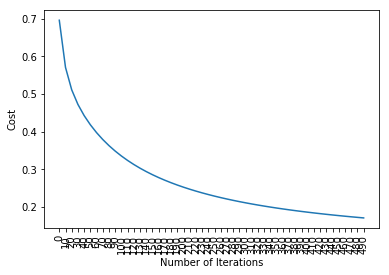

test accuracy : 97.79179810725552 %


In [13]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,number_of_iterations):
    dimension = x_train.shape[0]
    w,b = initialize_weight_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w,b,x_train,y_train,learning_rate,number_of_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("test accuracy : {} %".format(100-np.mean(np.abs(y_prediction_test - y_test))*100))


logistic_regression(x_train,y_train,x_test,y_test,learning_rate=1,number_of_iterations = 500) 

<div id="2"/>
## Sklearn Logistic Regression
>

These all functions all we have defined we can find all of it in sklearn library. Why we have done it? Actually we need to learn in fundamentally. Now you get its functionality.

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

test accuracy 0.9810725552050473


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
